In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
reddit_data = pd.read_csv("data/reddit_posts.csv")

In [3]:
reddit_data.columns

Index(['Unnamed: 0', 'text', 'labels', 'annotators', 'depth'], dtype='object')

In [ ]:
reddit_data.isna().sum()

In [4]:
reddit_data = reddit_data[reddit_data['text']!='[deleted]']

In [5]:
reddit_data['no_unique_annotations'] = reddit_data['labels'].apply(lambda x :len(set(x.split(";"))))

In [6]:
reddit_data['no_annotations'] = reddit_data['labels'].apply(lambda x :len(x.split(";")))

In [7]:
reddit_data['no_unique_annotations'].value_counts()

1    65262
2    39594
3     9645
Name: no_unique_annotations, dtype: int64

In [8]:
reddit_data['no_annotations'].value_counts()

3    107162
2      6115
1      1224
Name: no_annotations, dtype: int64

In [10]:
reddit_data['text_clean'] = reddit_data['text'].str.lower().str.strip().replace(re.compile('\s+'), ' ')

In [11]:
reddit_data['len_words'] = reddit_data['text'].astype(str).apply(lambda x:len(x.strip().lower().split(" ")))

In [12]:
reddit_data['len_char'] = reddit_data['text'].astype(str).apply(lambda x:sum([len(word) for word in x.strip().lower().split(" ")]))

In [13]:
reddit_data['len_words'].describe()

count    114501.000000
mean         43.971459
std          77.096302
min           1.000000
25%          10.000000
50%          22.000000
75%          49.000000
max        3336.000000
Name: len_words, dtype: float64

In [14]:
reddit_data['len_char'].describe()

count    114501.000000
mean        205.323019
std         370.929649
min           0.000000
25%          45.000000
50%         103.000000
75%         226.000000
max       19099.000000
Name: len_char, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

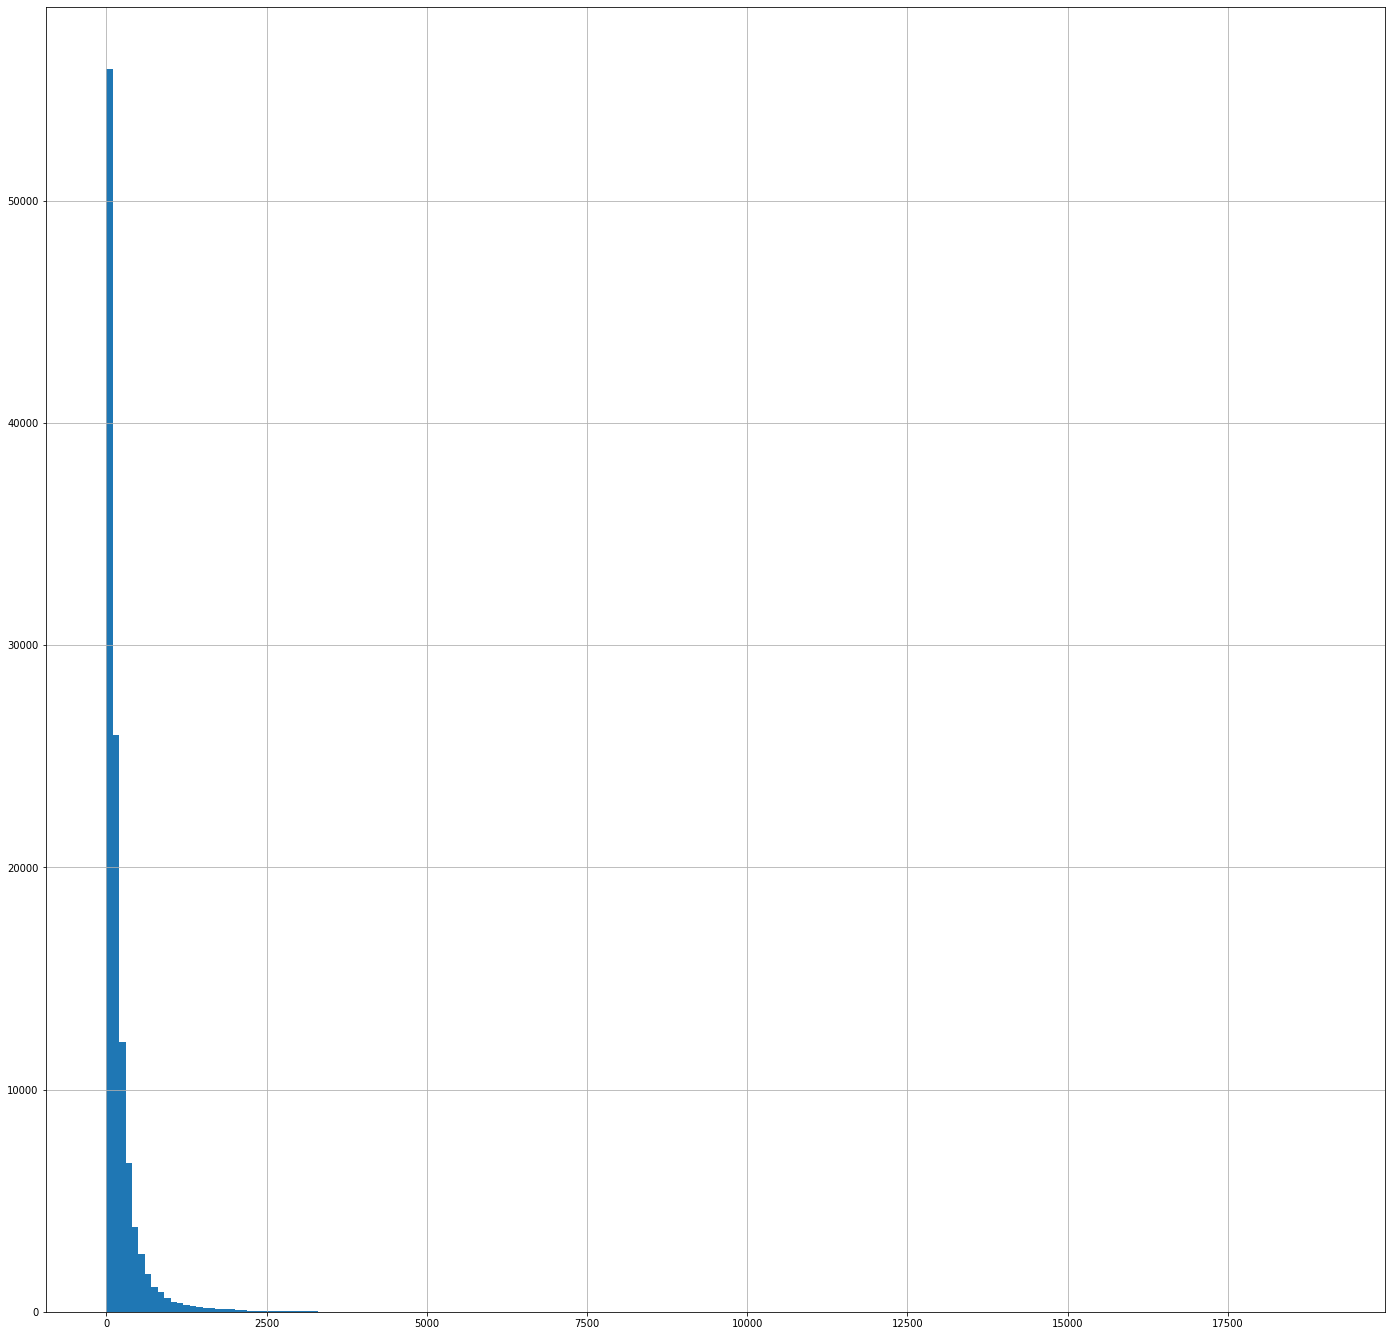

In [15]:
fig = plt.figure(figsize=(24,24))
reddit_data['len_char'].hist(bins=range(0,max(reddit_data['len_char']),100))
plt.show()

In [ ]:
reddit_data['len_char'].quantile([0.5,0.75,0.9,0.95])

In [16]:
annotators_count = {}
for row in reddit_data.itertuples(index=False):
    for annotator in row.annotators.split(";"):
        if annotator in annotators_count:
            annotators_count[annotator] += 1
        else:
            annotators_count[annotator] = 1

In [17]:
list(annotators_count.keys())

['fc96a15ab87f02dd1998ff55a64f6478',
 'e9e4b3ab355135fa954badcc06bfccc6',
 '31ac59c1734c1547d4d0723ff254c247',
 'd0bf500c45ae7c1c08eb65ef0a4e48f9',
 '29a90e15afc16faf25337162301c0328',
 'fd6076bf357438af2eab3af408e80dd9',
 'd3ff34d503cec21ac13d39d7440d5490',
 '9c89a75e42cad794ca168024b87b02c7',
 '313010445cba4a591e2368269a150e9f',
 '5d63b12e3a79e9d874e585dd1887b8d9',
 '4400a37586eae74b5d254c81cd70e4a9',
 '69fd9a3dad7cb11de711db4e9e0507bf',
 '887a4849ca16b52391353d094ca5aae2',
 '0c535342ca35d83ec8f025a060dd5ac6',
 '7447fd66d2d83d6577bce5cb0183b9ec',
 '38d643ea0762278cc21958fa2363041d',
 'd08f754eceb1c6b25096086067123c3e',
 'f8484f2bc9b23a4f9dc9f441a85d5747',
 '440ce79c0e6e377d44b1f9c585154a1f',
 '1b6842f6994d0e1dd00c2b611793d268',
 '324ca513dc5b339588057f321278791d',
 '84d17254e707caa405b61fa2ba5ff02f',
 'a7fed70cba60eca27950350c2173aaee',
 '343090f214e68ce7f8a0c4111d6022ec',
 'b2c904864465a6c1b286b21ac4092c5d',
 'e1474365f12144c30dbe712de11e0aca',
 '1791ac7859c3d5c7dd47b4eecada6cf1',
 

In [18]:
len(list(annotators_count.keys()))

37

In [19]:
def get_unique_label(data, label_col, annotator_col, count_dict):
    unique_label_list = []
    for row in data.itertuples(index=False):
        if len(set(row[data.columns.get_loc(label_col)].split(";"))) == 1:
            unique_label = row[data.columns.get_loc(label_col)].split(";")[0]
        elif len(set(row[data.columns.get_loc(label_col)].split(";"))) == len(row[data.columns.get_loc(label_col)].split(";")):
            unique_label = row[data.columns.get_loc(label_col)].split(";")[0]
            annotator = row[data.columns.get_loc(annotator_col)].split(";")[0]
            for i in range(1,len(row[data.columns.get_loc(annotator_col)].split(";"))):
                if count_dict[row[data.columns.get_loc(annotator_col)].split(";")[i]] > count_dict[annotator]:
                    unique_label = row[data.columns.get_loc(label_col)].split(";")[i]
                    annotator = row[data.columns.get_loc(annotator_col)].split(";")[i]
        else:
            count_label = {label:0 for label in set(row[data.columns.get_loc(label_col)].split(";"))}
            for label in row[data.columns.get_loc(label_col)].split(";"):
                count_label[label] += 1
            unique_label = sorted(count_label.items(), key=lambda x: x[1], reverse=True)[0][0]
        unique_label_list.append(unique_label)
    return unique_label_list
reddit_data['final_label'] = get_unique_label(reddit_data, "labels", "annotators", annotators_count)

In [20]:
reddit_data['final_label'].value_counts()

answer              42155
elaboration         22217
question            18132
appreciation        10570
agreement            5712
disagreement         4174
humor                3603
other                3195
negativereaction     2694
announcement         2049
Name: final_label, dtype: int64

In [21]:
reddit_data['count_question_marks'] = reddit_data['text'].apply(lambda x:str(x).count("?"))

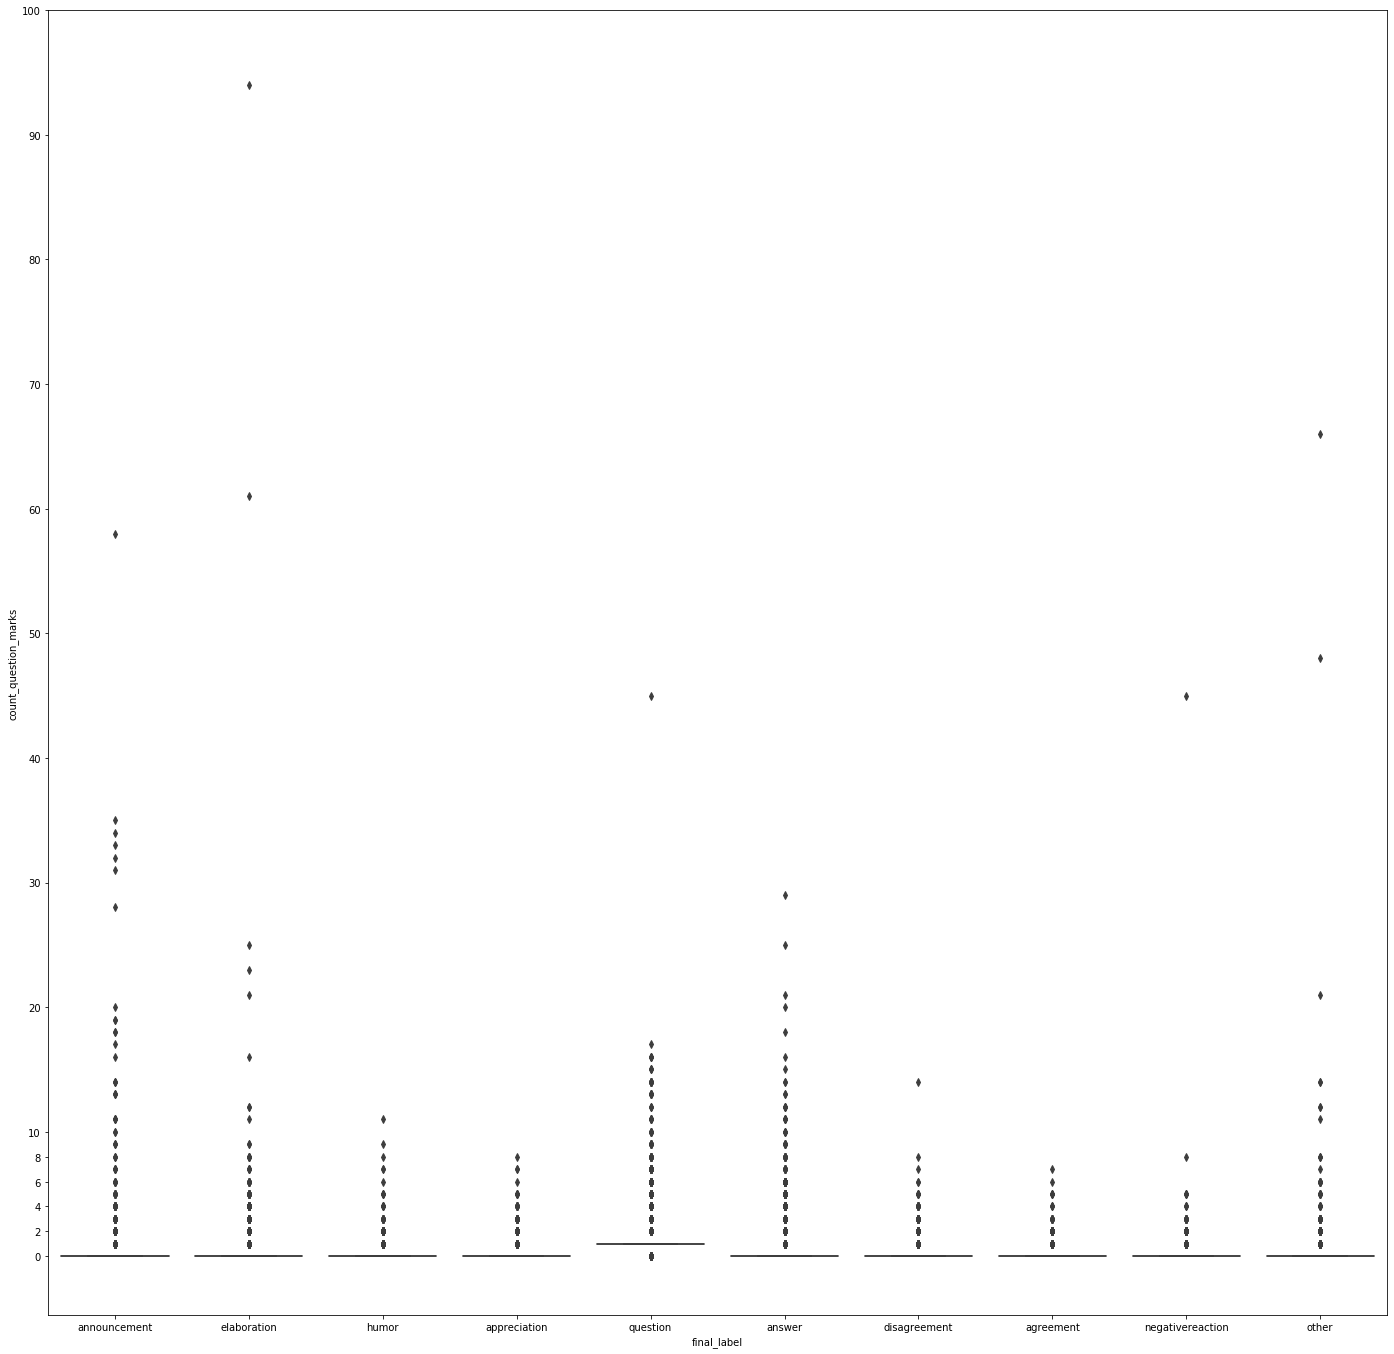

In [22]:
import seaborn as sns
from numpy import median
fig = plt.figure(figsize = (24,24))
sns.boxplot(x = 'final_label', y = 'count_question_marks', data = reddit_data)
plt.yticks([0,2,4,6,8,10,20,30,40,50,60,70,80,90,100])
plt.show()

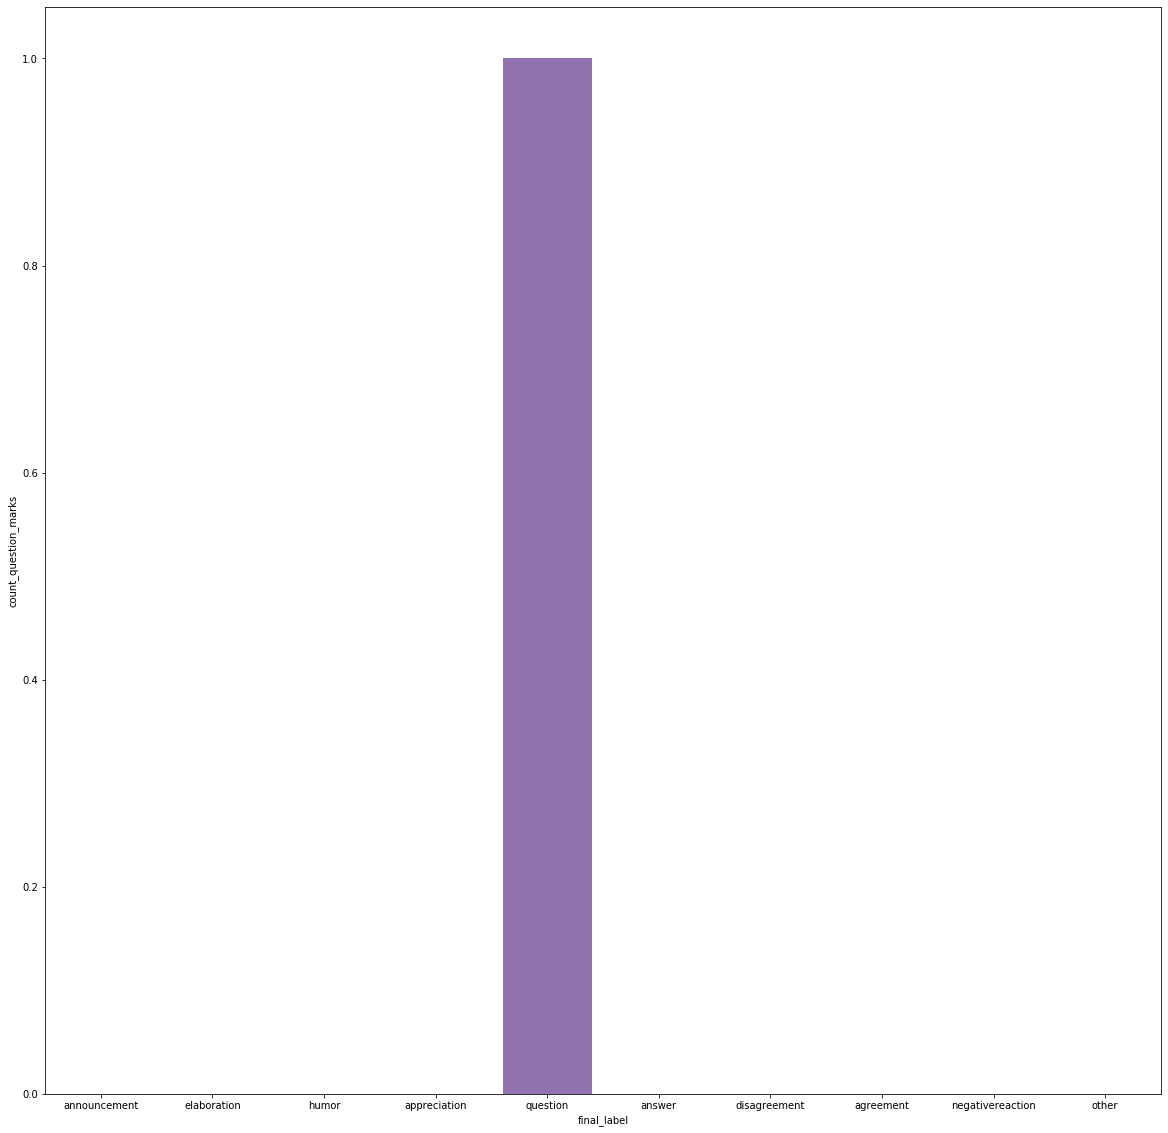

In [23]:
fig = plt.figure(figsize = (20,20))
sns.barplot(x = 'final_label', y = 'count_question_marks', data = reddit_data)
# plt.yticks([0,2,4,6,8,10,20,30,40,50,60,70,80,90,100])
plt.show()

In [25]:
reddit_data['count_line'] = reddit_data['text'].apply(lambda x:str(x).count("\n"))

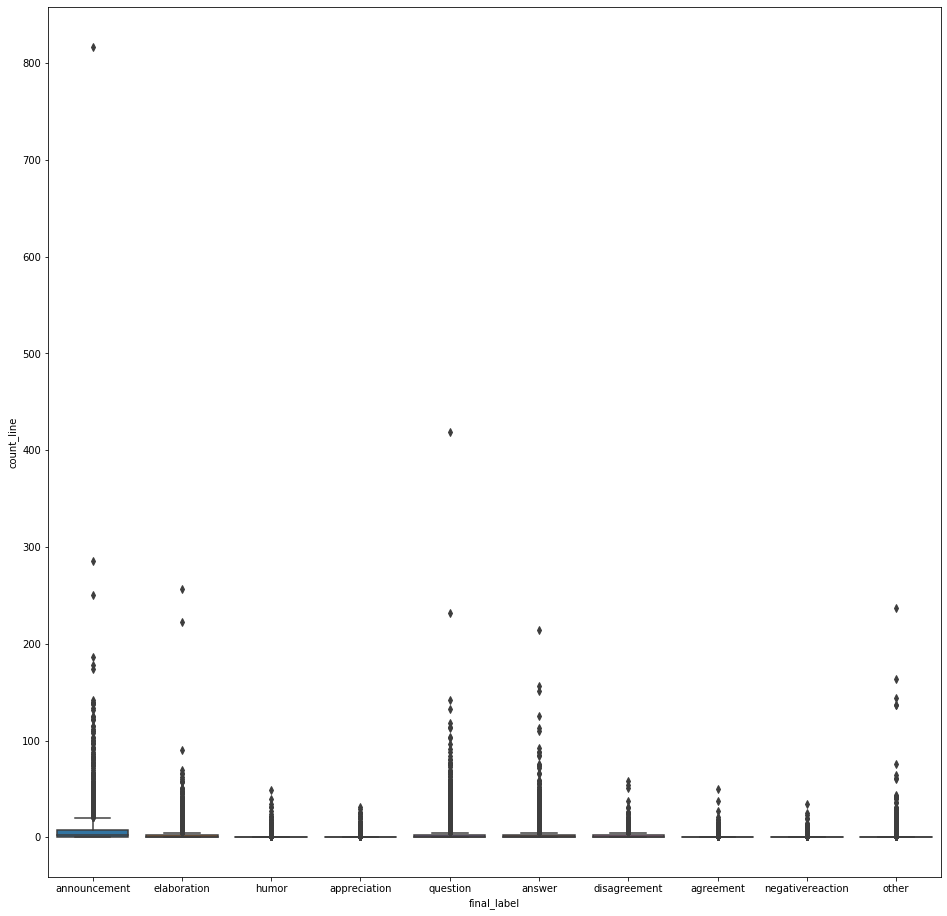

In [28]:
fig = plt.figure(figsize = (16,16))
sns.boxplot(x = 'final_label', y = 'count_line', data = reddit_data)
plt.show()

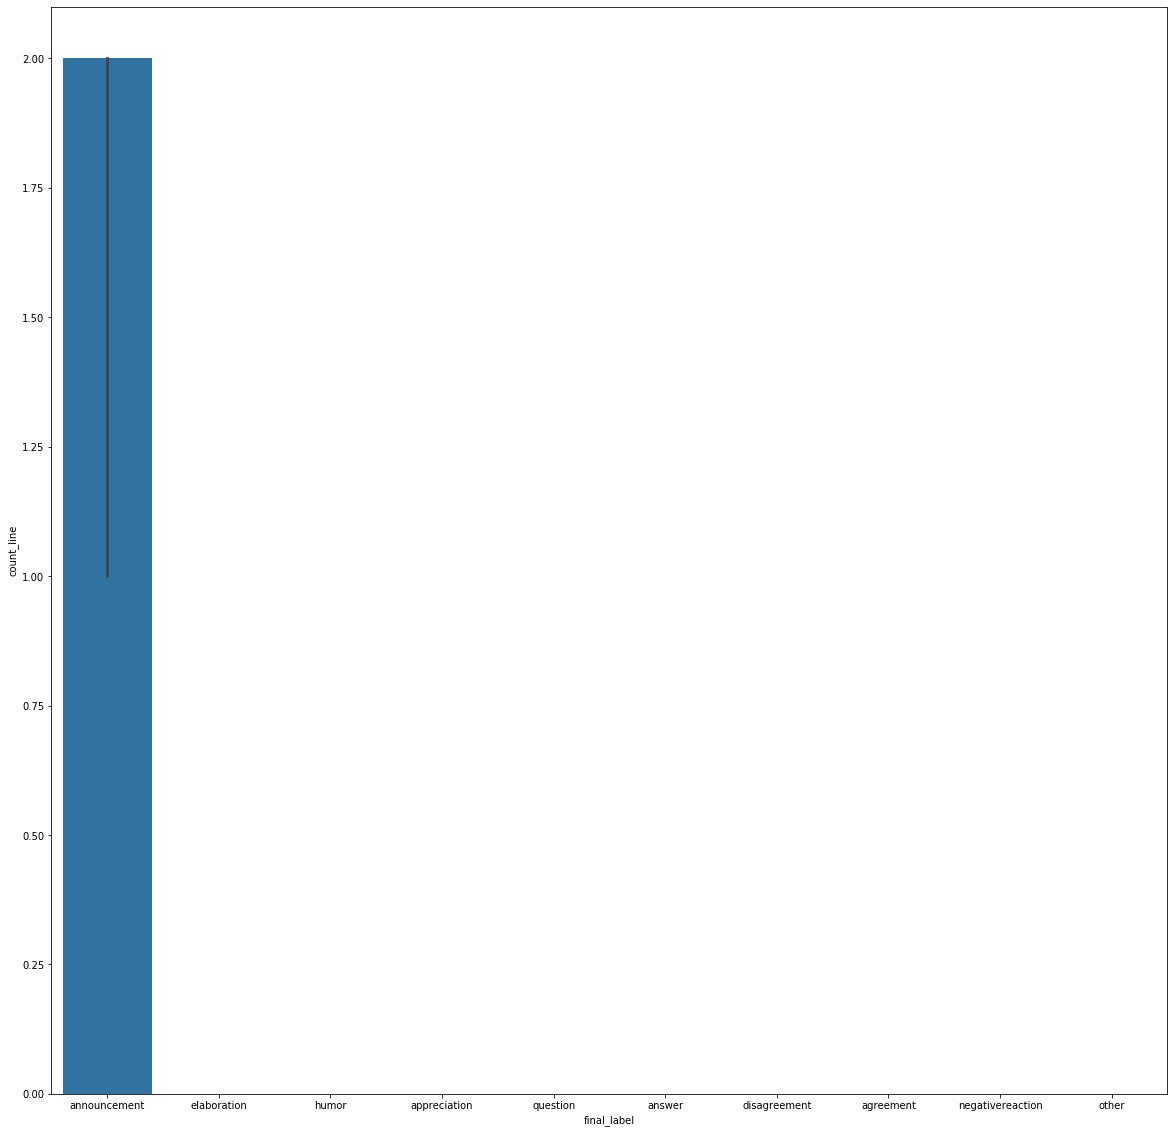

In [27]:
fig = plt.figure(figsize = (20,20))
sns.barplot(x = 'final_label', y = 'count_line', data = reddit_data,estimator=median)
plt.show()

In [29]:
reddit_data['count_exclamation'] = reddit_data['text'].apply(lambda x:str(x).count("!"))

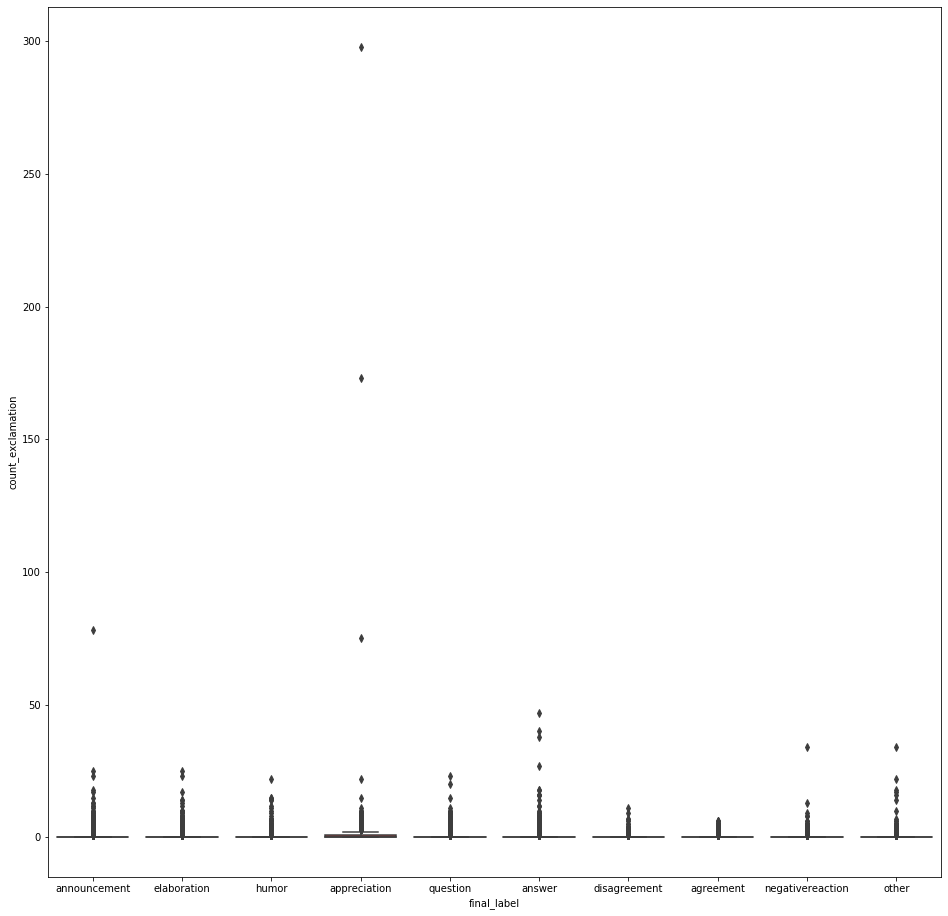

In [30]:
fig = plt.figure(figsize = (16,16))
sns.boxplot(x = 'final_label', y = 'count_exclamation', data = reddit_data)
plt.show()

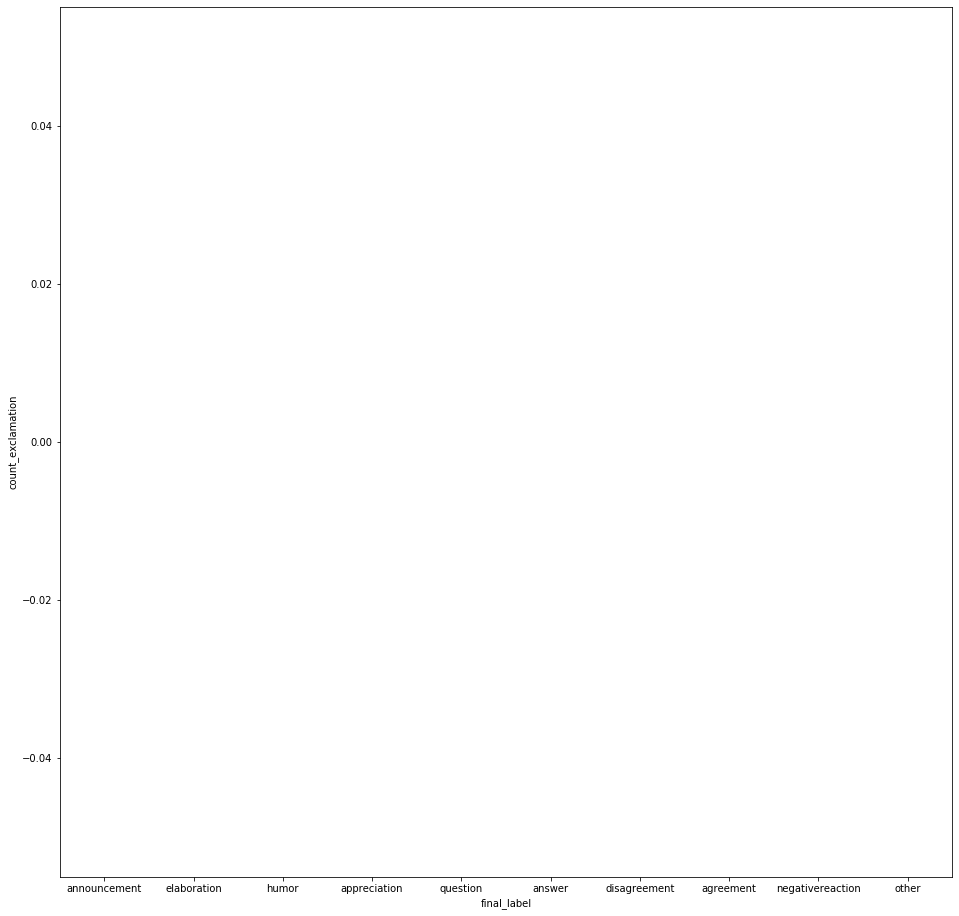

In [34]:
fig = plt.figure(figsize = (16,16))
sns.barplot(x = 'final_label', y = 'count_exclamation', data = reddit_data, estimator = median)
plt.show()

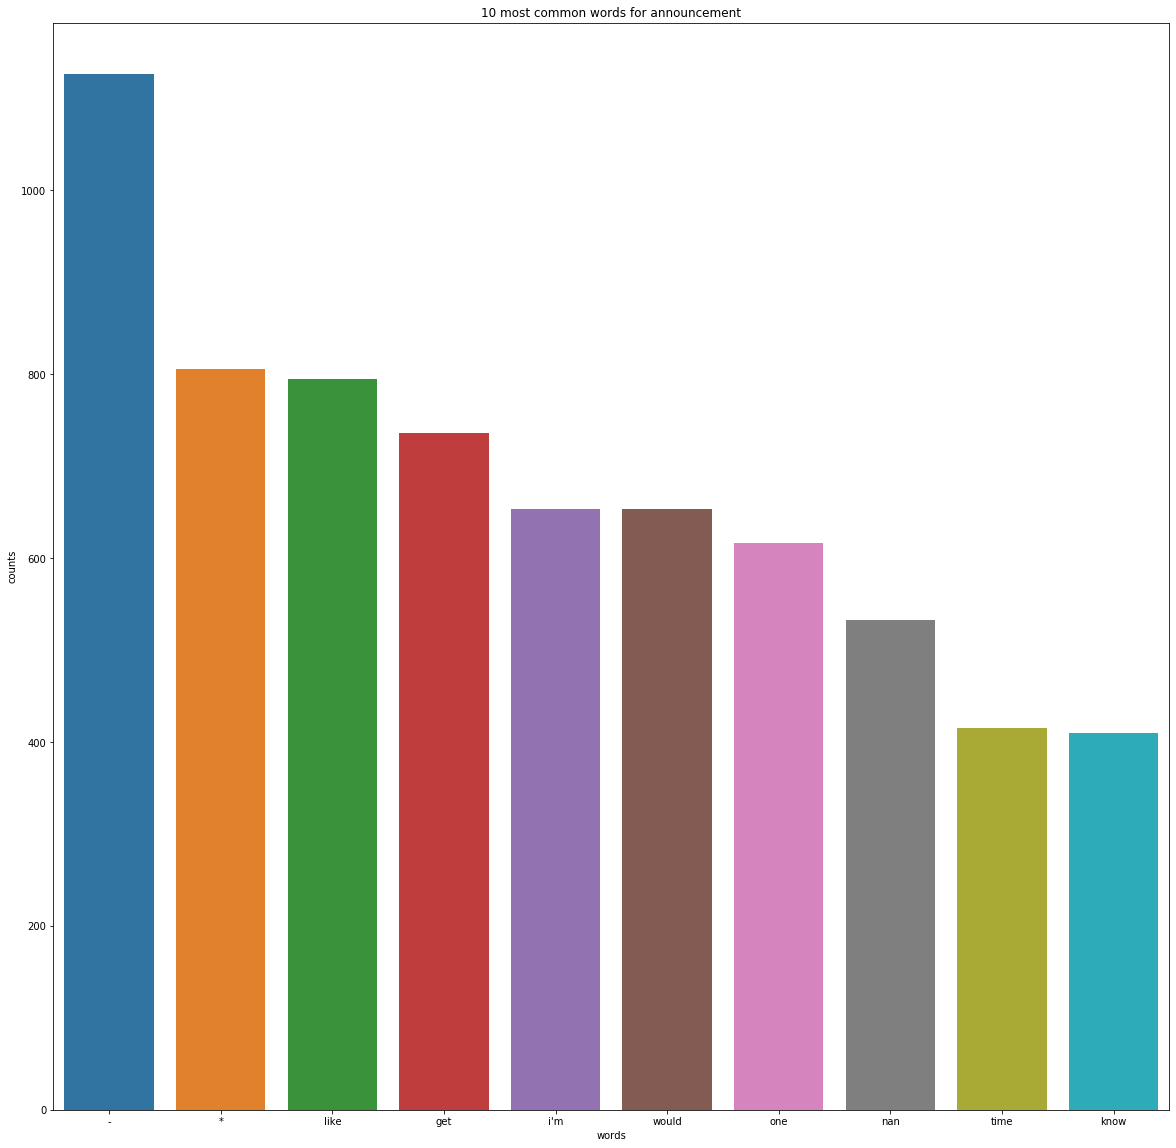

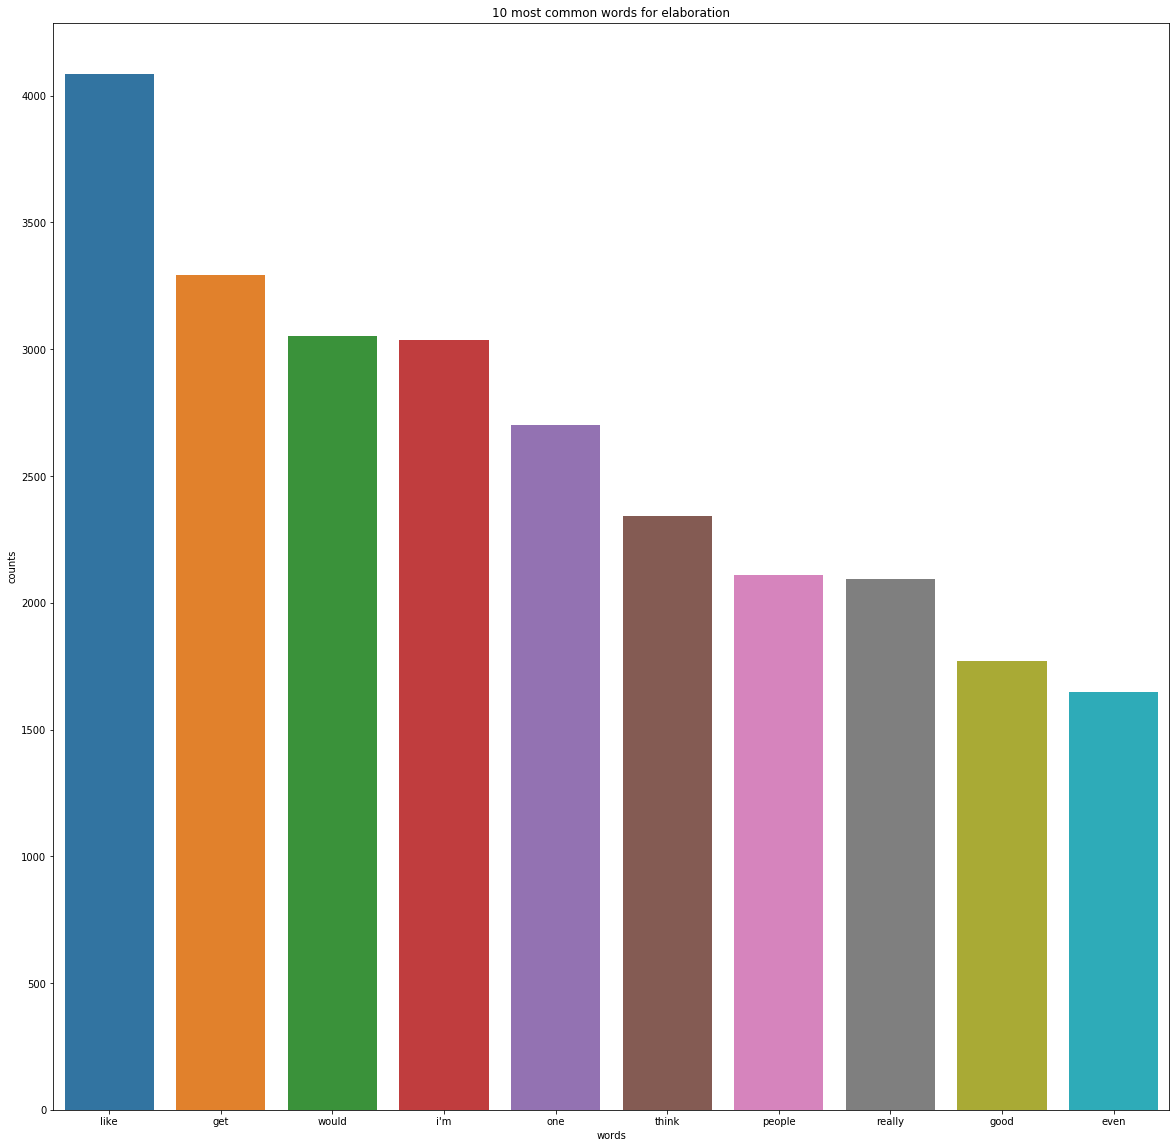

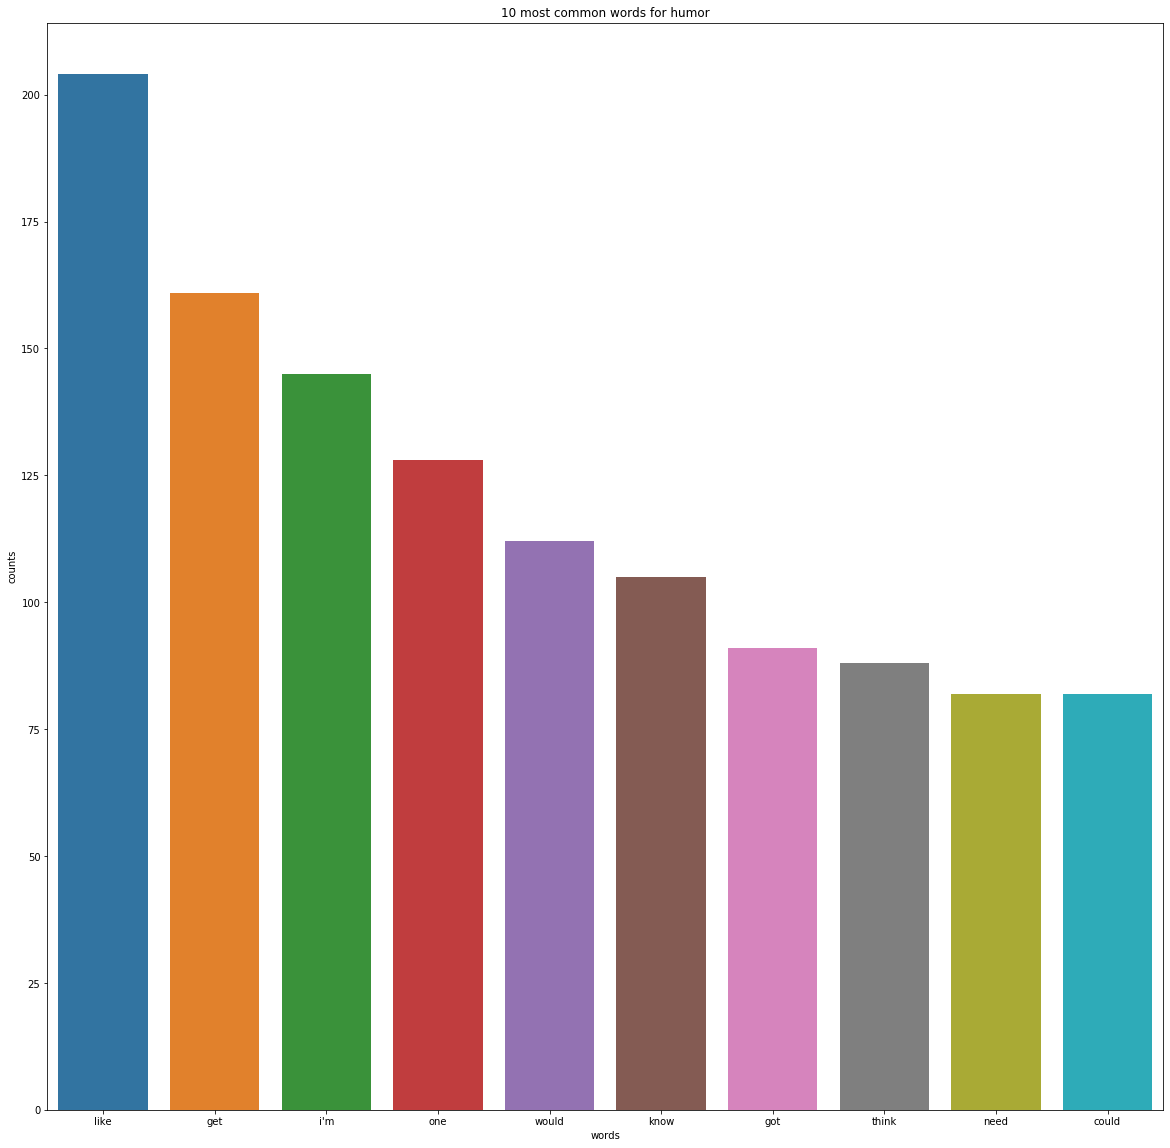

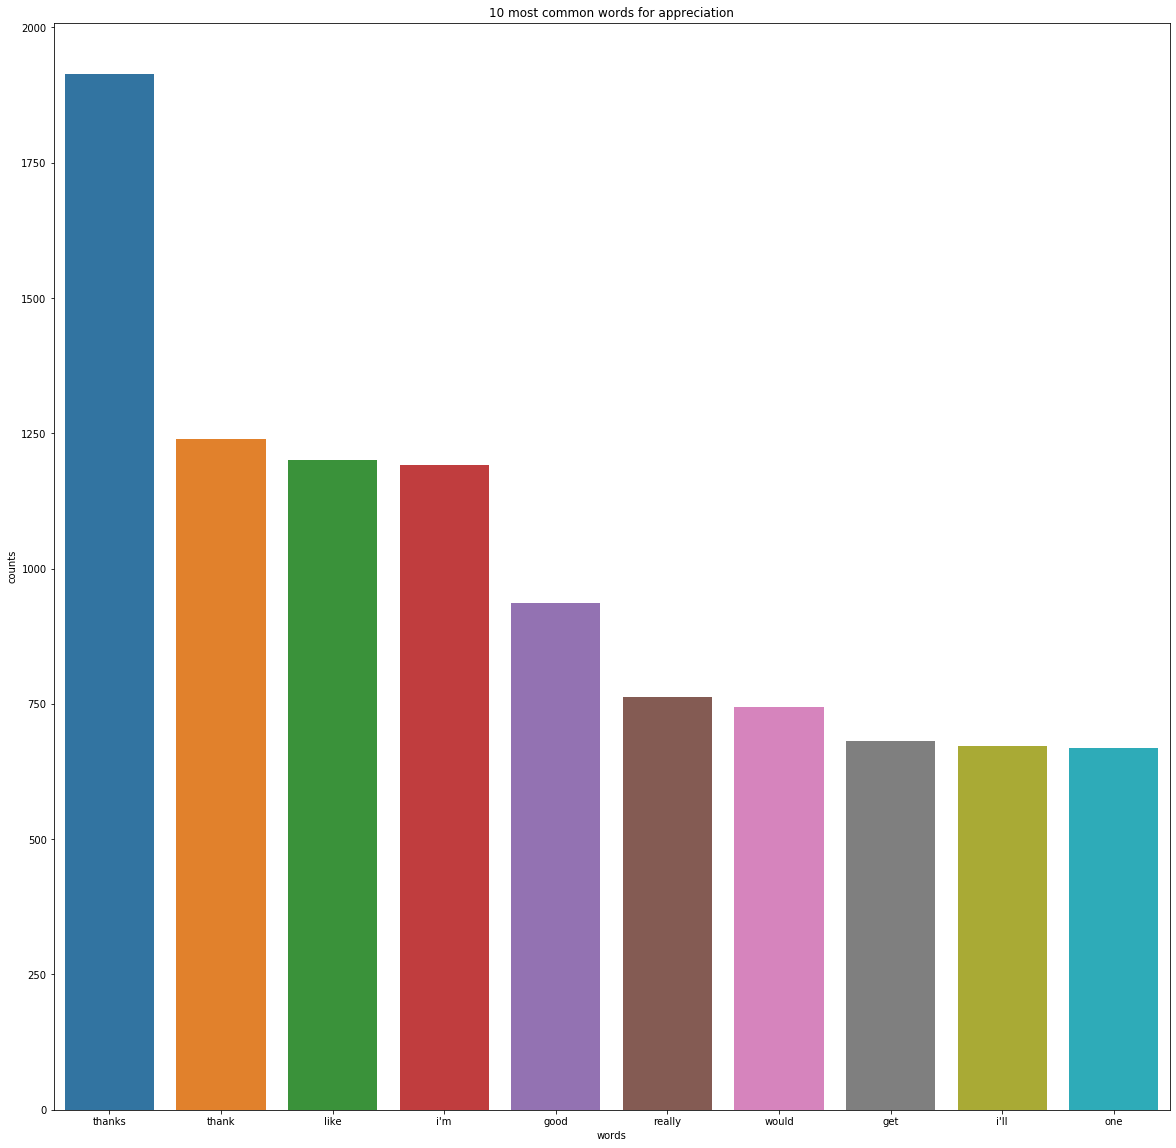

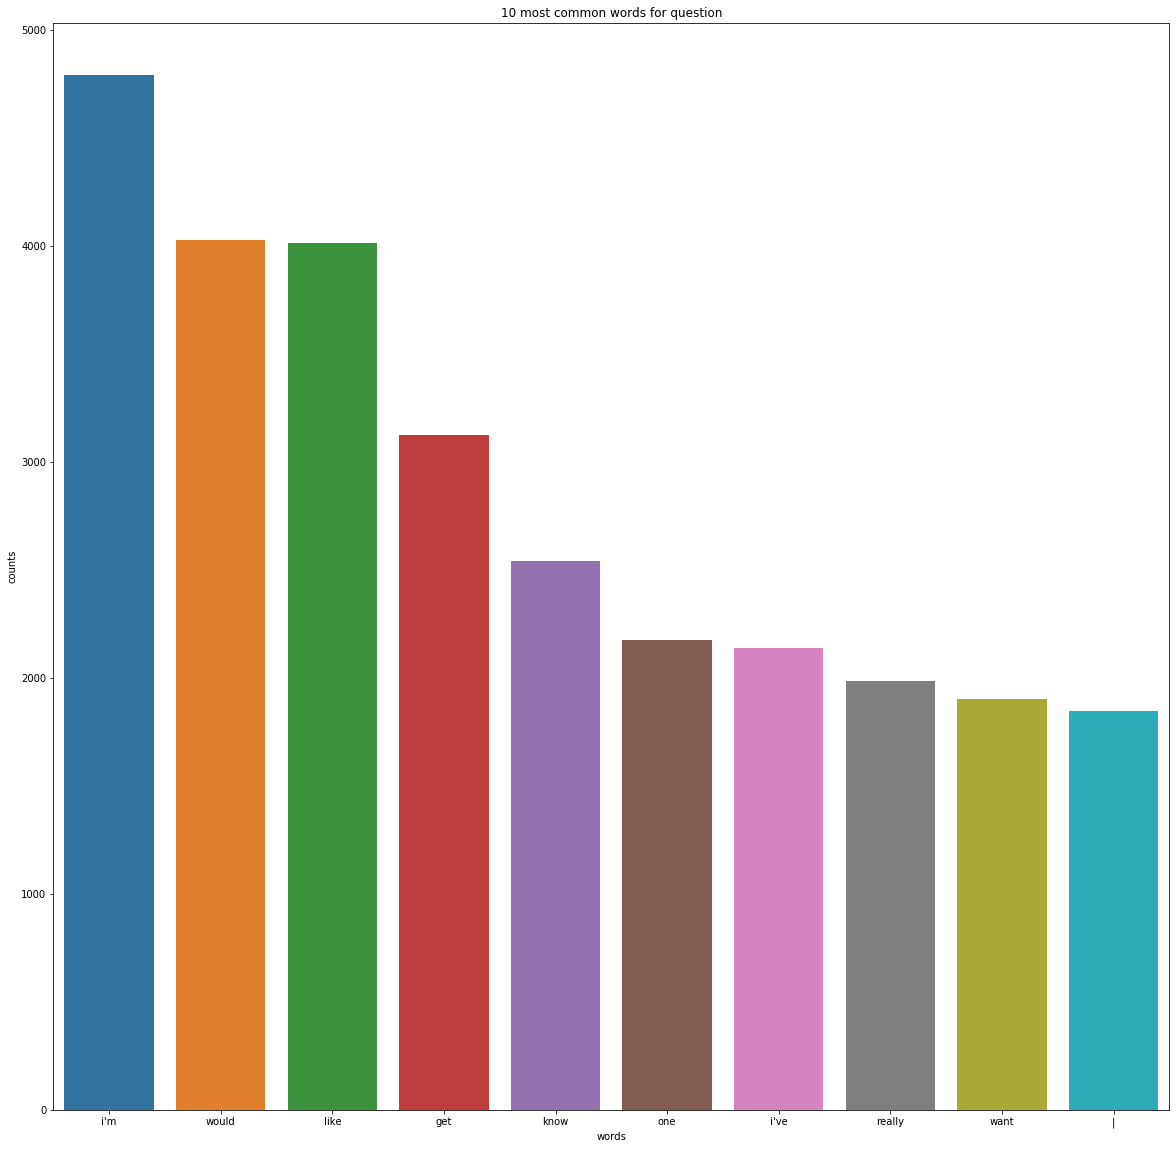

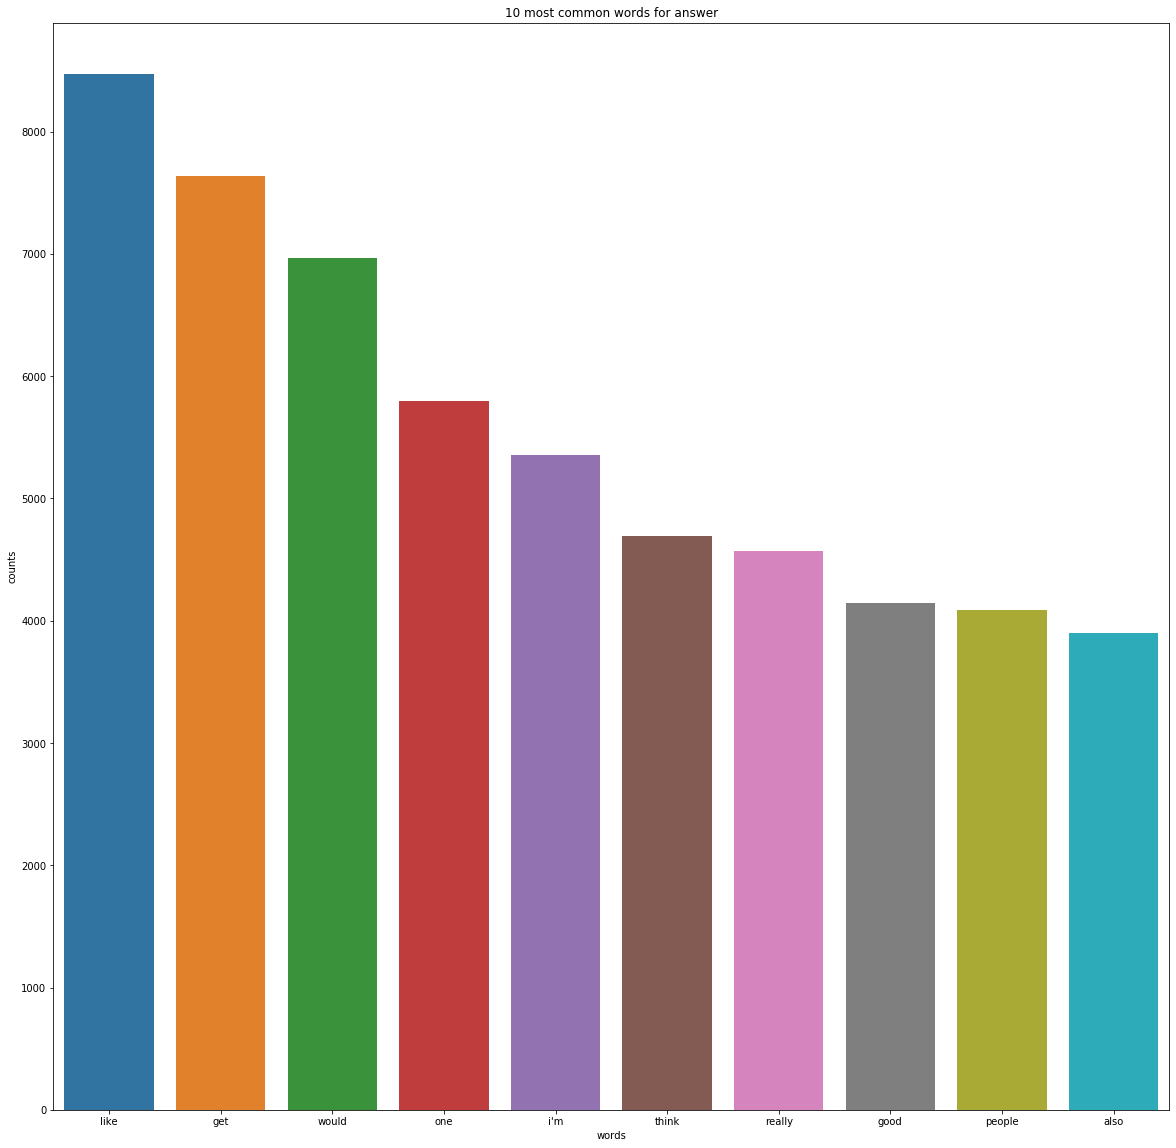

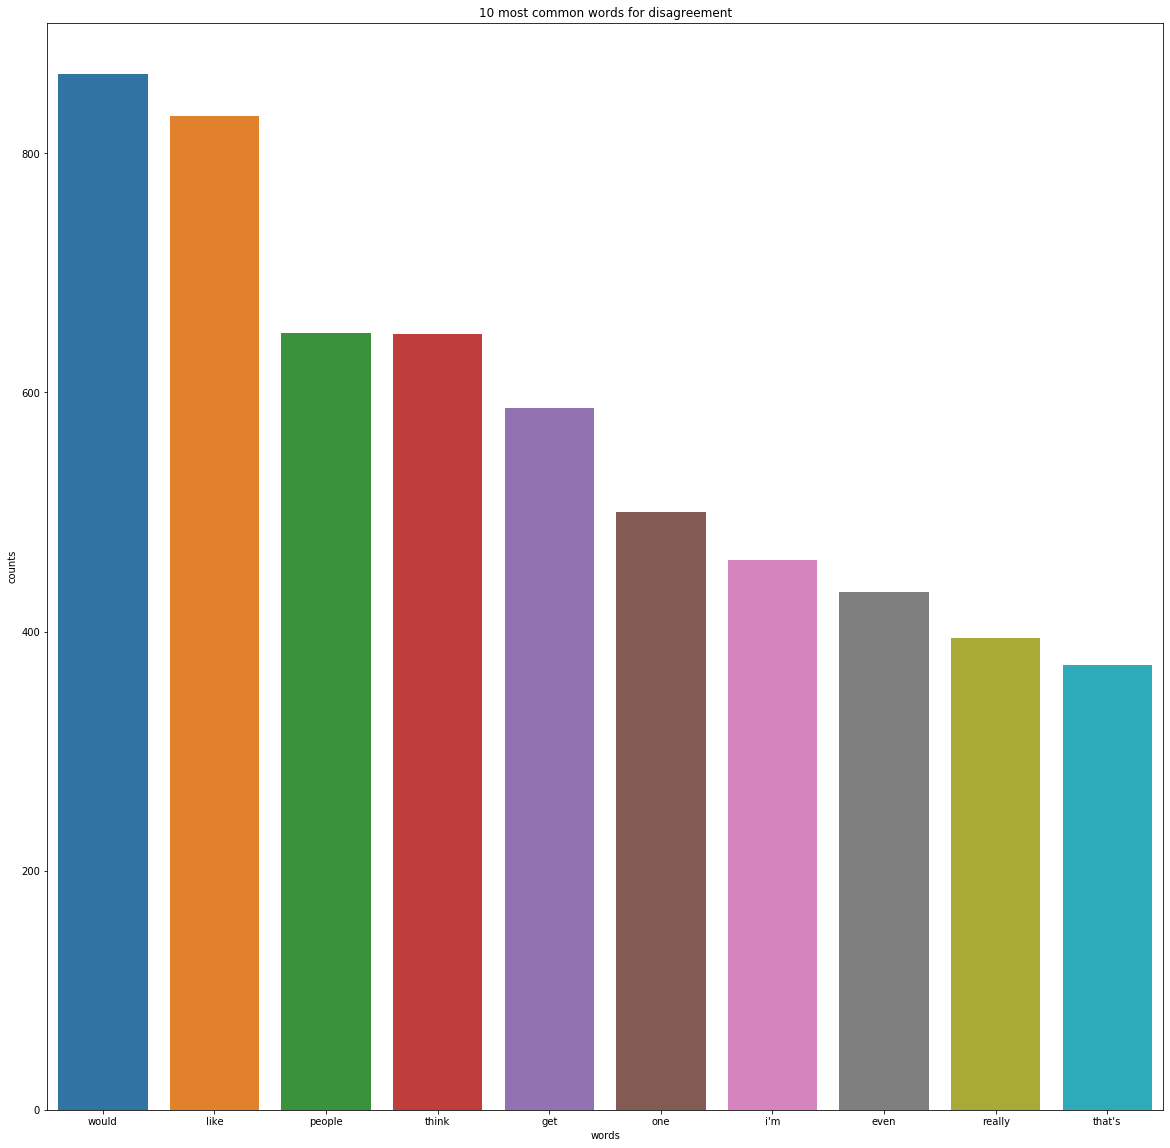

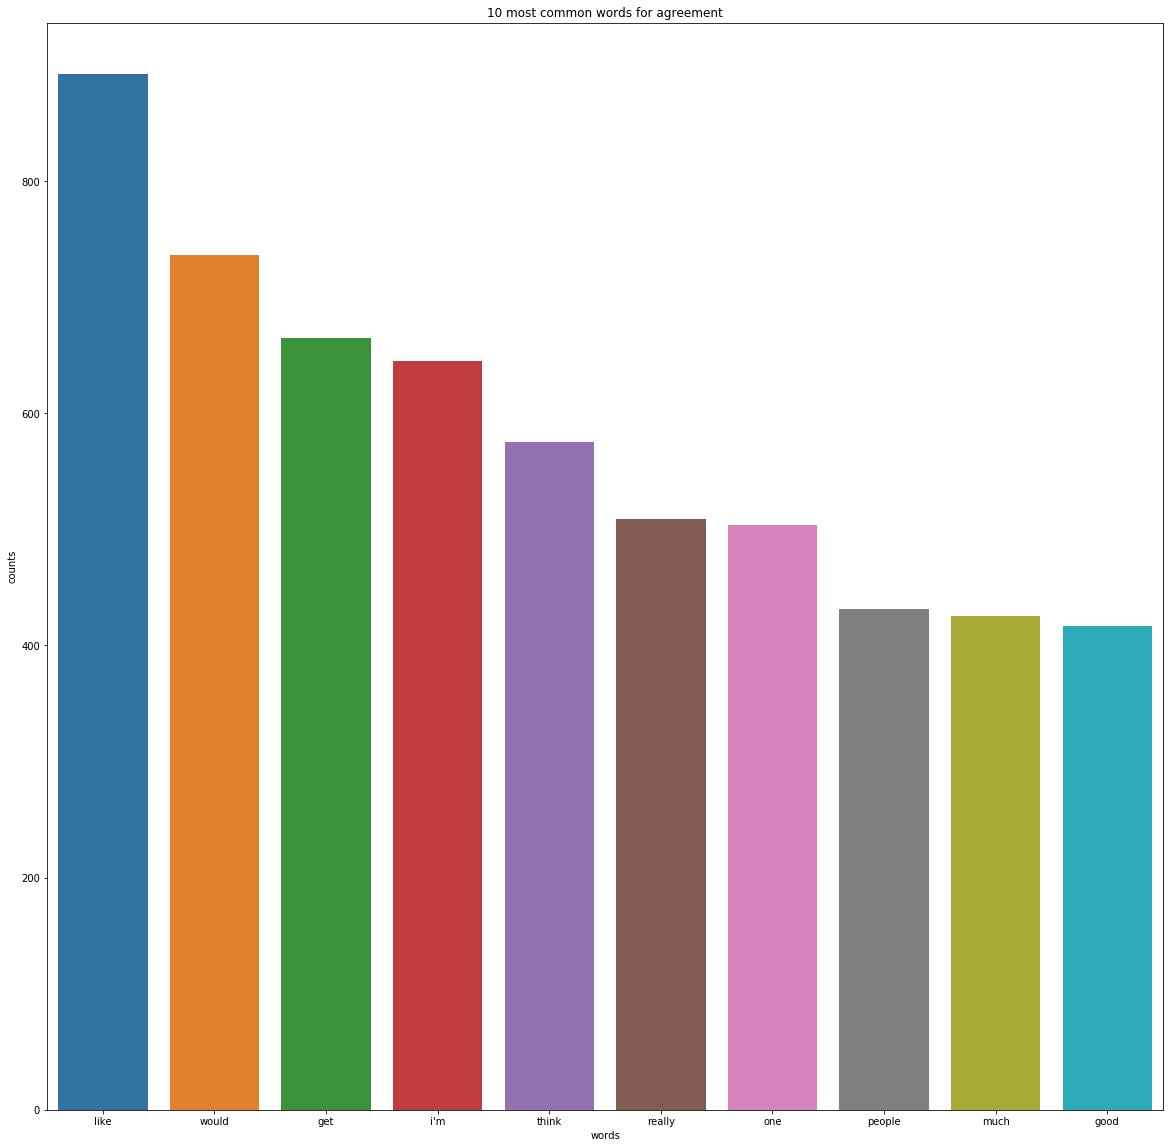

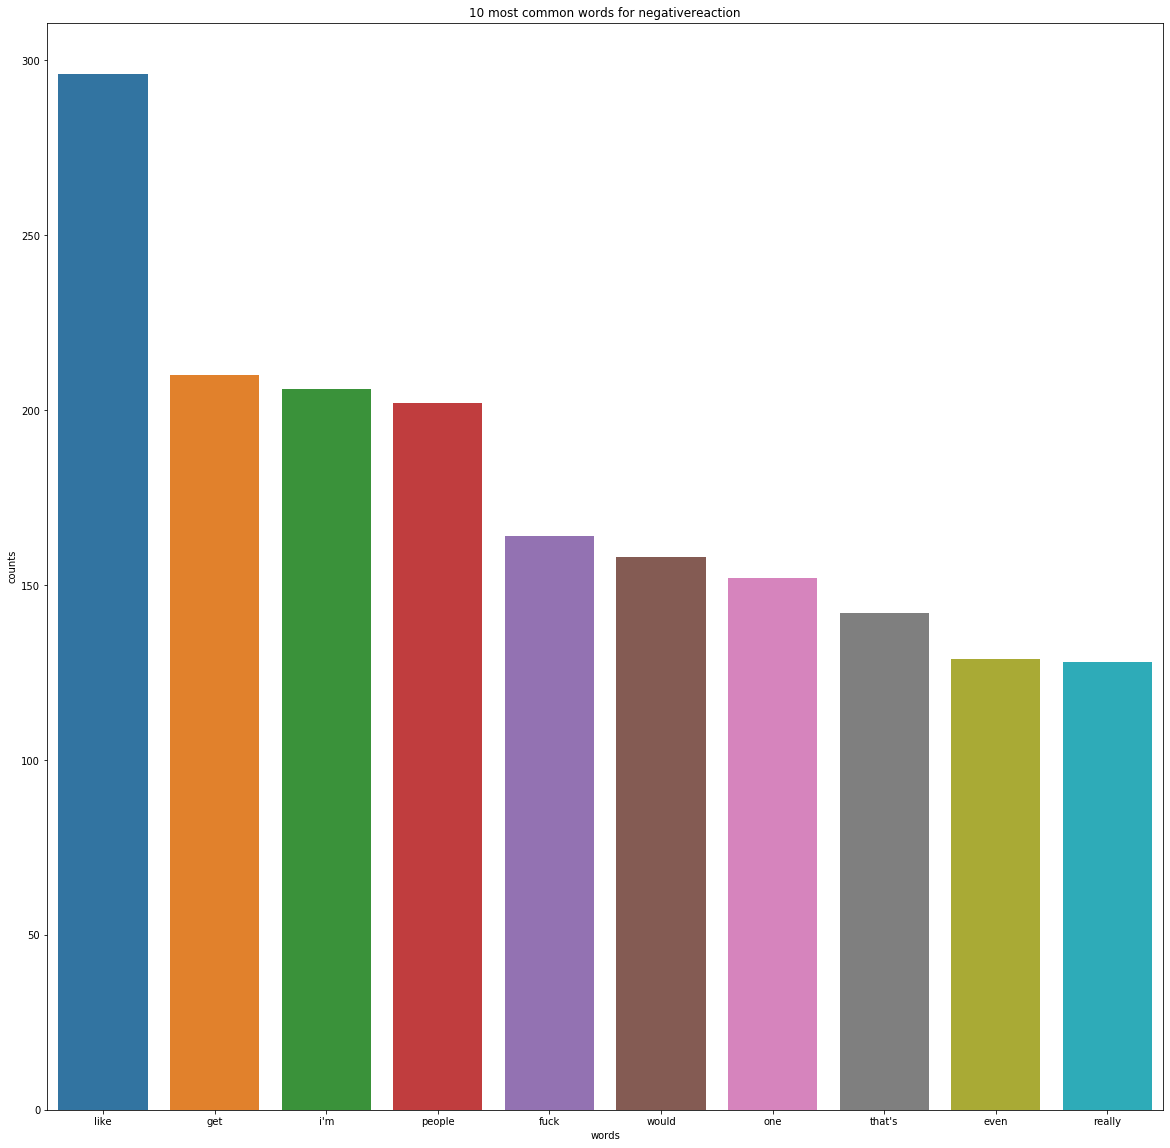

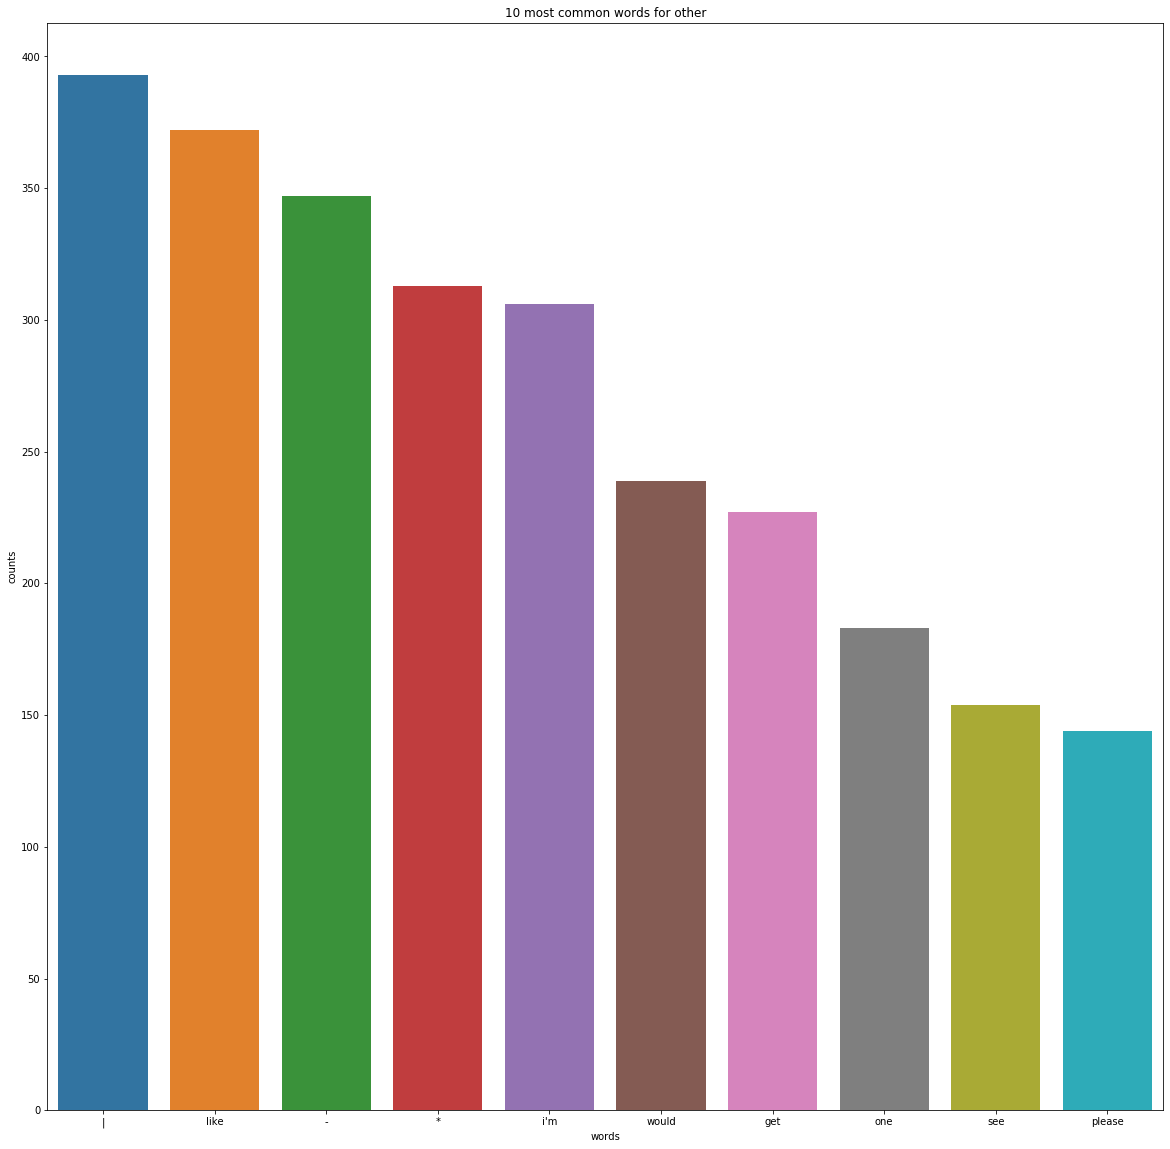

In [36]:
import nltk
from nltk.corpus import stopwords
for label in pd.unique(reddit_data['final_label']):
    unigram_dist = nltk.FreqDist([word for des in reddit_data[reddit_data['final_label']==label]['text_clean'].astype(str).str.lower() for word in des.split(" ") if word != "" and word not in stopwords.words('english')])
    top_10_unigram = pd.DataFrame(unigram_dist.most_common(10), columns = ['words','counts'])
    fig = plt.figure(figsize=(20,20))
    sns.barplot(x='words',y='counts', data=top_10_unigram)
    plt.title("10 most common words for %s" %label)
    plt.show()
    